In [ ]:
# Decodes of CA and San Joaquin Valley Counties
ca_code = "06"
fresno_code = "019"
kern_code = "029"
kings_code = "031"
madera_code = "039"
merced_code = "047"
san_joaquin_code = "077"
stanislaus_code = "099"
tulare_code = "107"

In [ ]:
# Decodes of Pollutants
pm25 = "88101"

wind_speed_scalar = "61101"
wind_direction_scalar = "61102"
temperature = "62101"
rel_humidity = "62201"
solar_radiation = "63301"

In [ ]:
# import the libraries
import requests
import pandas as pd
import time

# show all columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)           # No line wrapping
pd.set_option('display.max_colwidth', None)


In [ ]:
# Initialize an empty DataFrame
fresno_pm25_df = pd.DataFrame()

# Loop over the years from 1980 to 2024
for year in range(1999, 2026):
    if year == 2025:
      url = f"https://aqs.epa.gov/data/api/dailyData/byCounty?email=munkh-erdene.khuderbaatar@sjsu.edu&key=bluebird66&param={pm25},{wind_speed_scalar},{wind_direction_scalar},{temperature},{rel_humidity},{solar_radiation}&bdate={str(year) + '0101'}&edate={str(year) + '0501'}&state={ca_code}&county={fresno_code}"
    else:
      url = f"https://aqs.epa.gov/data/api/dailyData/byCounty?email=munkh-erdene.khuderbaatar@sjsu.edu&key=bluebird66&param={pm25},{wind_speed_scalar},{wind_direction_scalar},{temperature},{rel_humidity},{solar_radiation}&bdate={str(year) + '0101'}&edate={str(year) + '1231'}&state={ca_code}&county={fresno_code}"

    try:
        # Make the request
        response = requests.get(url)
        data = response.json()
        if data.get('Header', [])[0]['status'] == "Success":
            # Normalize the JSON data into a flat DataFrame
            current_year_data = pd.json_normalize(data.get('Data', []))

            # Concatenate the current year's data with the main DataFrame
            fresno_pm25_df = pd.concat([fresno_pm25_df, current_year_data], ignore_index=True)
            print(f"Added data for {year}")
        else:
            print(f"No data for {year}")

    except requests.exceptions.RequestException as e:
        # Handle any request-related errors (e.g., network issues)
        print(f"Request failed for {year}: {e}")

    # Wait for a short time before the next request (10 second)
    time.sleep(6)

# After the loop ends, you can process the `df` DataFrame
print("complete")
fresno_pm25_df.to_csv('fresno_pm25.csv', index=False)


Added data for 1999
Added data for 2000
Added data for 2001
Added data for 2002
Added data for 2003
Added data for 2004
Added data for 2005
Added data for 2006
Added data for 2007
Added data for 2008
Added data for 2009
Added data for 2010
Added data for 2011
Added data for 2012
Added data for 2013
Added data for 2014
Added data for 2015
Added data for 2016
Added data for 2017
Added data for 2018
Added data for 2019
Added data for 2020
Added data for 2021
Added data for 2022
Added data for 2023
Added data for 2024
Added data for 2025
complete


#Extract Individual Data

In [ ]:
solar_radiation = fresno_pm25_df[fresno_pm25_df["parameter"] == "Solar radiation"]

In [ ]:
rel_humidity = fresno_pm25_df[fresno_pm25_df["parameter"] == "Relative Humidity "]

In [ ]:
wind_dir = fresno_pm25_df[fresno_pm25_df["parameter"] == "Wind Direction - Scalar"]

In [ ]:
wind_speed = fresno_pm25_df[fresno_pm25_df["parameter"] == "Wind Speed - Scalar"]

In [ ]:
temperature = fresno_pm25_df[fresno_pm25_df["parameter"] == "Outdoor Temperature"]

In [ ]:
pm25 = fresno_pm25_df[fresno_pm25_df["parameter"] == "PM2.5 - Local Conditions"]

#Select Valid Sampling Methods

In [ ]:
solar_radiation = solar_radiation.groupby(["date_local", "site_number"])["arithmetic_mean"].mean()

KeyError: 'Column not found: arithmetic_mean'

In [ ]:
solar_radiation = solar_radiation.reset_index()

In [ ]:
rel_humidity = rel_humidity.groupby(["date_local", "site_number"])["arithmetic_mean"].mean()

KeyError: 'Column not found: arithmetic_mean'

In [ ]:
rel_humidity = rel_humidity.reset_index()

In [ ]:
wind_dir = wind_dir.groupby(["date_local", "site_number"])["arithmetic_mean"].mean()

In [ ]:
wind_dir = wind_dir.reset_index()

In [ ]:
wind_speed = wind_speed.groupby(["date_local", "site_number"])["arithmetic_mean"].mean()

In [ ]:
wind_speed = wind_speed.reset_index()

In [ ]:
temperature = temperature.groupby(["date_local", "site_number"])["arithmetic_mean"].mean()

In [ ]:
temperature = temperature.reset_index()

In [ ]:
pm25 = pm25.groupby(["date_local", "site_number"])["arithmetic_mean"].mean()

In [ ]:
pm25 = pm25.reset_index()

#Merge PM 2.5 with the Meteorological Data

In [ ]:
merged_df = pd.merge(pm25, rel_humidity, on=['date_local', 'site_number'])

In [ ]:
merged_df.rename(columns={
    'arithmetic_mean_x': 'pm25',
    'athimetic_mean_y': 'rel_humidity'
}, inplace=True)

In [ ]:
merged_df = pd.merge(merged_df, wind_speed, on=['date_local', 'site_number'])

In [ ]:
merged_df.rename(columns={
    'arithmetic_mean_y': 'rel_humidity',
    'arithmetic_mean': 'wind_speed'
}, inplace=True)

In [ ]:
merged_df = pd.merge(merged_df, temperature, on=['date_local', 'site_number'])

In [ ]:
merged_df.rename(columns={"arithmetic_mean":"temperature"}, inplace=True)

In [ ]:
merged_df = pd.merge(merged_df, solar_radiation, on=['date_local', 'site_number'])

In [ ]:
merged_df.rename(columns={"arithmetic_mean":"solar_radiation"}, inplace=True)

In [ ]:
merged_df[["year", "month", "day"]] = merged_df["date_local"].str.split("-", expand=True)

In [ ]:
unique_days_per_month = merged_df.groupby(["year", "month"])["day"].unique().reset_index()

In [ ]:
unique_days_per_month[unique_days_per_month["year"] == "2012"]

,year,month,day
147,2012,01,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
148,2012,02,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]"
149,2012,03,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
150,2012,04,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]"
151,2012,05,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
152,2012,06,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]"
153,2012,07,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
154,2012,08,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
155,2012,09,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]"
156,2012,10,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"


In [ ]:
merged_df_continuous = merged_df[merged_df["year"] >= "2012"]

#Plot Correlation Between PM 2.5 and Meteorological Data

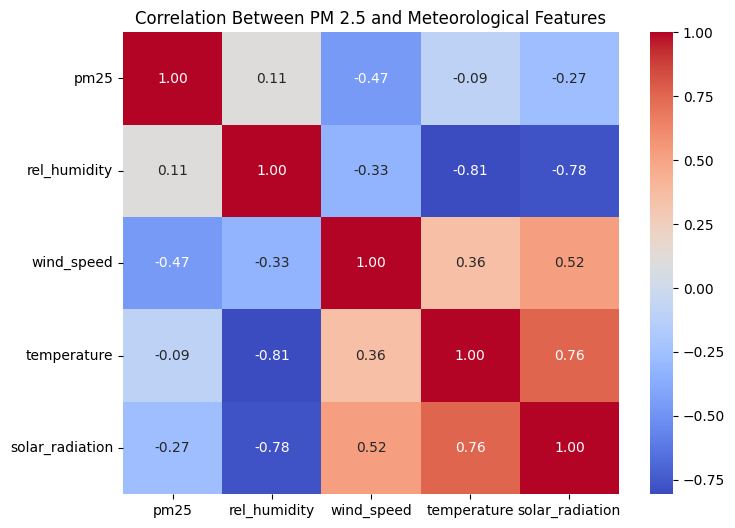

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = ['pm25', 'rel_humidity', 'wind_speed', 'temperature', 'solar_radiation']
correlation_matrix = merged_df_continuous[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between PM 2.5 and Meteorological Features')
plt.show()

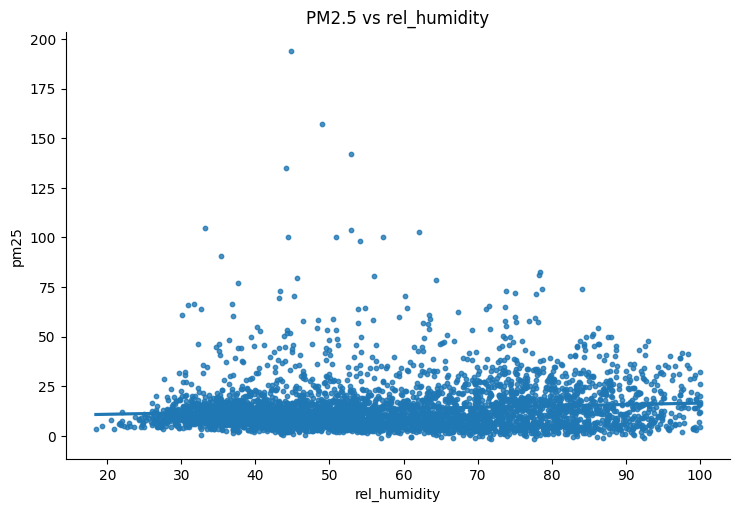

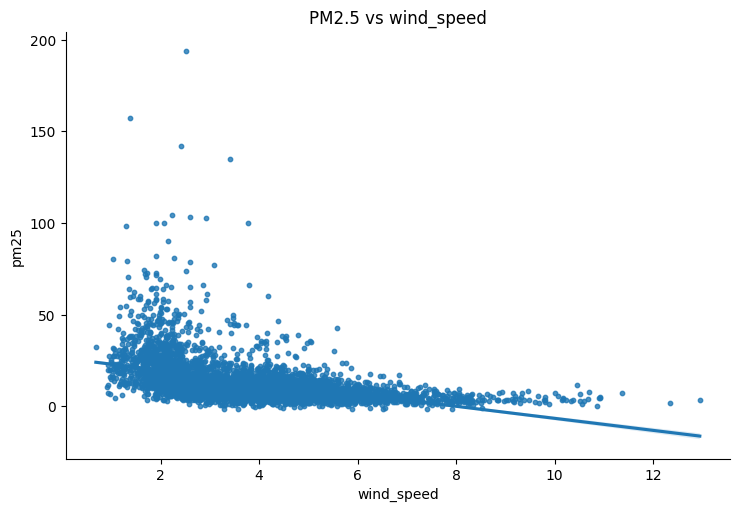

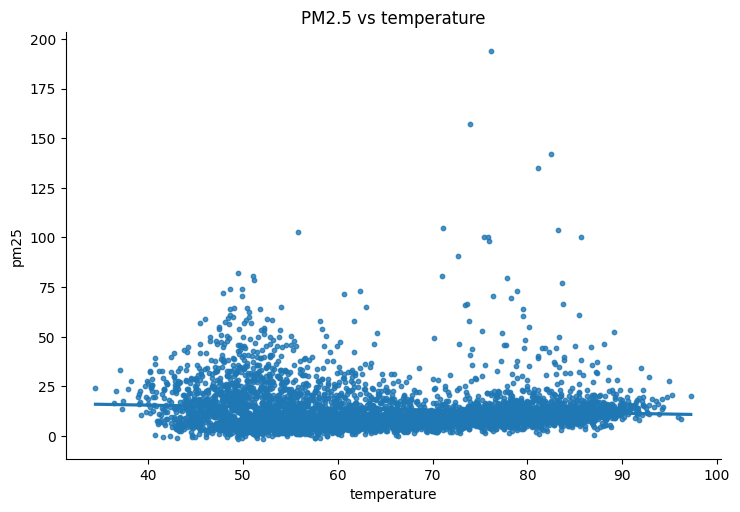

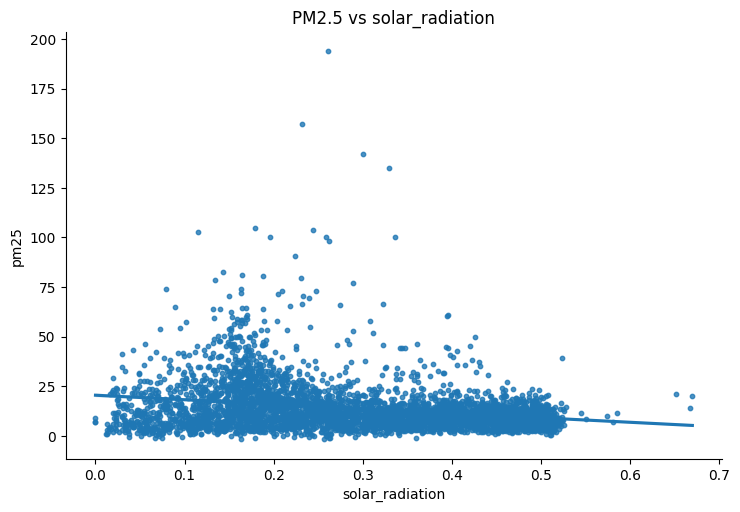

In [ ]:
features = ['rel_humidity', 'wind_speed', 'temperature', 'solar_radiation']

for feature in features:
    sns.lmplot(data=merged_df_continuous, x=feature, y='pm25', aspect=1.5, scatter_kws={"s": 10})
    plt.title(f'PM2.5 vs {feature}')
    plt.show()

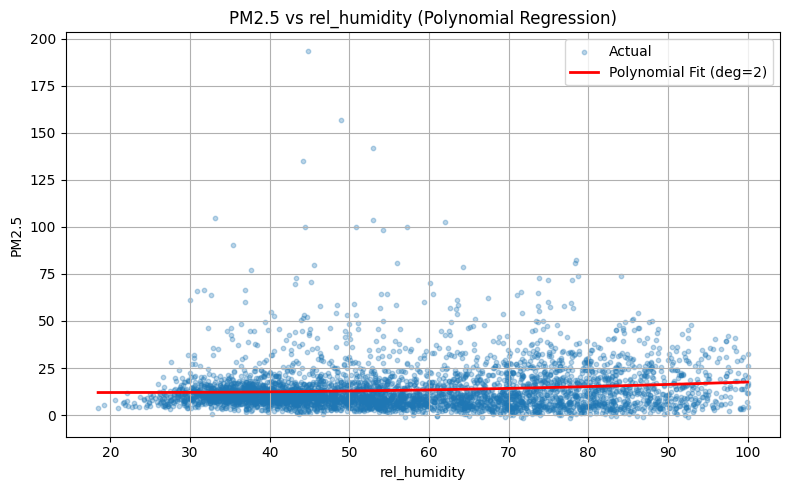

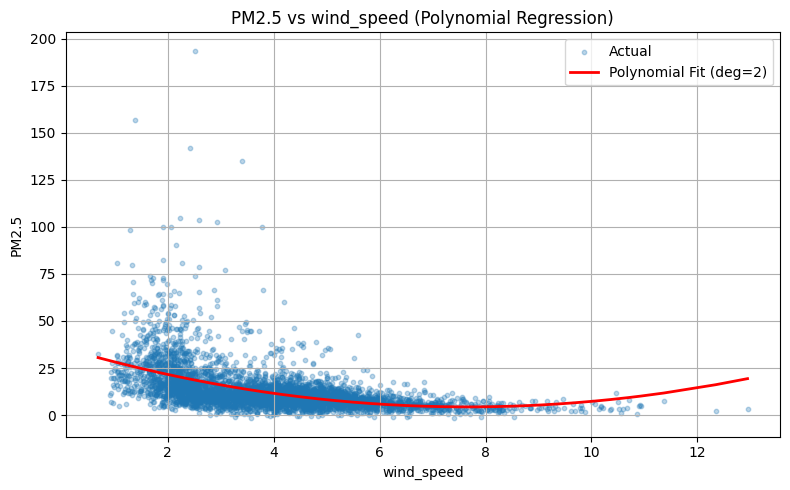

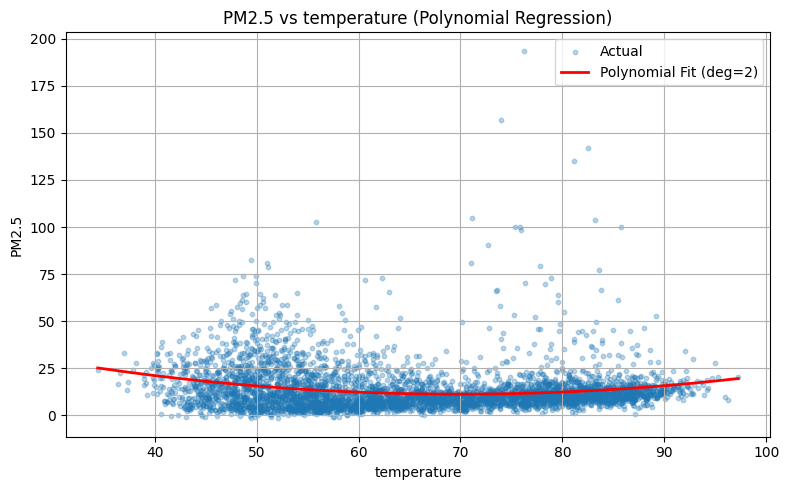

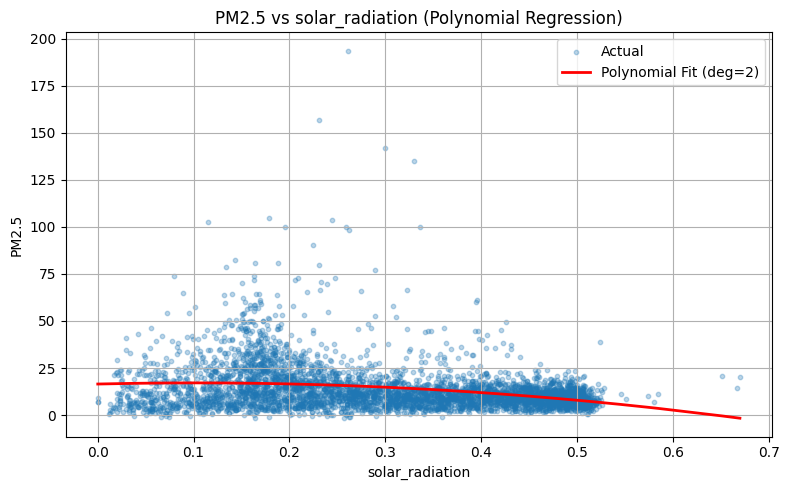

In [ ]:
import numpy as np

for feature in features:
    # Drop NaNs
    data = merged_df_continuous[[feature, 'pm25']].dropna()

    # Fit a 2nd-degree polynomial
    x = data[feature].values
    y = data['pm25'].values
    coeffs = np.polyfit(x, y, deg=2)
    poly_eqn = np.poly1d(coeffs)
    x_sorted = np.sort(x)
    y_pred = poly_eqn(x_sorted)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.3, label='Actual', s=10)
    plt.plot(x_sorted, y_pred, color='red', label='Polynomial Fit (deg=2)', linewidth=2)
    plt.xlabel(feature)
    plt.ylabel('PM2.5')
    plt.title(f'PM2.5 vs {feature} (Polynomial Regression)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Interpolate the Missing Values of All Features From 2012 to 2024

In [ ]:
daily_index = pd.date_range(start="2012-01-01", end="2024-12-31", freq="D")

In [ ]:
merged_df_continuous["date_local"] = pd.to_datetime(merged_df_continuous["date_local"])

<ipython-input-180-c63bd5ef6c4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_continuous["date_local"] = pd.to_datetime(merged_df_continuous["date_local"])


In [ ]:
merged_df_continuous = merged_df_continuous.set_index("date_local")

In [ ]:
merged_df_continuous = merged_df_continuous.reindex(daily_index)

In [ ]:
# Fill in the missing values based on time; Interpolates based on actual time gaps
merged_df_continuous["pm25"] = merged_df_continuous["pm25"].interpolate(method="time")

In [ ]:
# Fill in the missing values based on time; Interpolates based on actual time gaps
merged_df_continuous["rel_humidity"] = merged_df_continuous["rel_humidity"].interpolate(method="time")

In [ ]:
# Fill in the missing values based on time; Interpolates based on actual time gaps
merged_df_continuous["wind_speed"] = merged_df_continuous["wind_speed"].interpolate(method="time")

In [ ]:
# Fill in the missing values based on time; Interpolates based on actual time gaps
merged_df_continuous["temperature"] = merged_df_continuous["temperature"].interpolate(method="time")

In [ ]:
# Fill in the missing values based on time; Interpolates based on actual time gaps
merged_df_continuous["solar_radiation"] = merged_df_continuous["solar_radiation"].interpolate(method="time")

In [ ]:
merged_df_continuous.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4749 entries, 2012-01-01 to 2024-12-31
Freq: D
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   site_number      4468 non-null   object 
 1   pm25             4749 non-null   float64
 2   rel_humidity     4749 non-null   float64
 3   wind_speed       4749 non-null   float64
 4   temperature      4749 non-null   float64
 5   solar_radiation  4749 non-null   float64
 6   year             4468 non-null   object 
 7   month            4468 non-null   object 
 8   day              4468 non-null   object 
dtypes: float64(5), object(4)
memory usage: 371.0+ KB


#Train and Test LSTM Models With and Without Meteorological Features to Determine if These Features Help the Model Perform Better

Prepare the data

In [ ]:
# Model 1: Using only PM2.5
df_pm25 = merged_df_continuous[['pm25']]

# Model 2: Using PM2.5 and Temperature
df_pm25_temp = merged_df_continuous[['pm25', 'temperature']]

# Model 3: Using PM2.5 and Wind Speed
df_pm25_wind_speed = merged_df_continuous[['pm25', 'wind_speed']]

# Model 4: Using PM2.5 and Humidity
df_pm25_rel_humidity = merged_df_continuous[['pm25', 'rel_humidity']]

# Model 5: Using PM2.5 and Solar Radiation
df_pm25_solar_radiation = merged_df_continuous[['pm25', 'solar_radiation']]

# Model 2: Using PM2.5 and all other meteorological features
df_all = merged_df_continuous[['pm25', 'temperature', 'wind_speed', 'rel_humidity', 'solar_radiation']]


In [ ]:
df_pm25.to_csv("df_pm25.csv", index=False)
df_pm25_temp.to_csv("df_pm25_temp.csv", index=False)
df_pm25_wind_speed.to_csv("df_pm25_wind_speed.csv", index=False)
df_pm25_rel_humidity.to_csv("df_pm25_rel_humidity.csv", index=False)
df_pm25_solar_radiation.to_csv("df_pm25_solar_radiation.csv", index=False)
df_all.to_csv("df_all.csv", index=False)


Create Sequences for LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


def run_lstm_pipeline(df, target_col='pm25', n_lags=14, test_size=0.2, epochs=50, batch_size=32, plot=True, test_dates=None, model_name="PM2.5 Prediction"):
    # Normalize
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # Prepare sequences
    X, y = [], []
    for i in range(n_lags, len(scaled_data)):
        X.append(scaled_data[i - n_lags:i])
        y.append(scaled_data[i, 0])  # Only predict pm25

    X, y = np.array(X), np.array(y)

    # Train/test split
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )

    # Predict and inverse transform
    y_pred = model.predict(X_test)

    # To inverse only pm25, pad with zeros
    y_pred_pad = np.zeros((len(y_pred), df.shape[1]))
    y_pred_pad[:, 0] = y_pred[:, 0]
    y_pred_rescaled = scaler.inverse_transform(y_pred_pad)[:, 0]

    y_test_pad = np.zeros((len(y_test), df.shape[1]))
    y_test_pad[:, 0] = y_test
    y_test_rescaled = scaler.inverse_transform(y_test_pad)[:, 0]

    # Evaluation
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

    # Print Results
    print(f"{model_name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")

    # Plot
    plt.figure(figsize=(12, 4))
    if test_dates is not None:
      plt.plot(test_dates, y_test_rescaled, label='Actual PM2.5')
      plt.plot(test_dates, y_pred_rescaled, label=f'Predicted - {model_name}')
    else:
      plt.plot(y_test_rescaled, label='Actual PM2.5')
      plt.plot(y_pred_rescaled, label=f'Predicted - {model_name}')
    plt.title(f'{model_name} - PM2.5 Prediction')
    plt.xlabel('Time')
    plt.ylabel('PM2.5')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, mae, rmse, r2


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss:

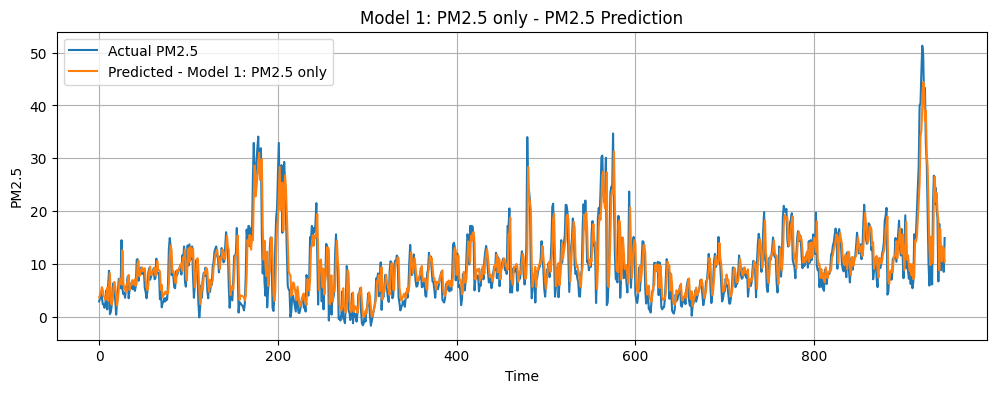

In [ ]:
model, mae, rmse, r2 = run_lstm_pipeline(df_pm25, model_name="Model 1: PM2.5 only")
model.save("pm25_only.h5")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 

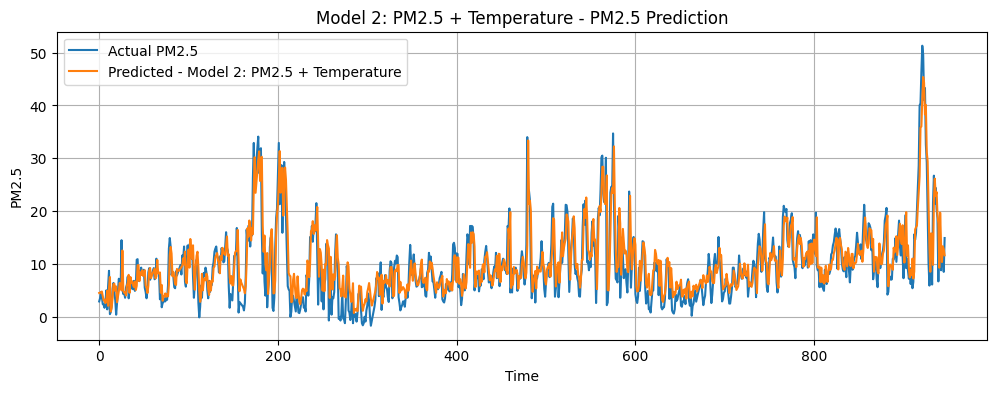

In [ ]:
model, mae, rmse, r2 = run_lstm_pipeline(df_pm25_temp, model_name="Model 2: PM2.5 + Temperature")
model.save("pm25_temperature.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
MAE: 2.81
MSE: 14.28
RMSE: 3.78
R²: 0.70
Model 2: PM2.5 + Wind Speed: MAE=2.81, RMSE=3.78, R²=0.699


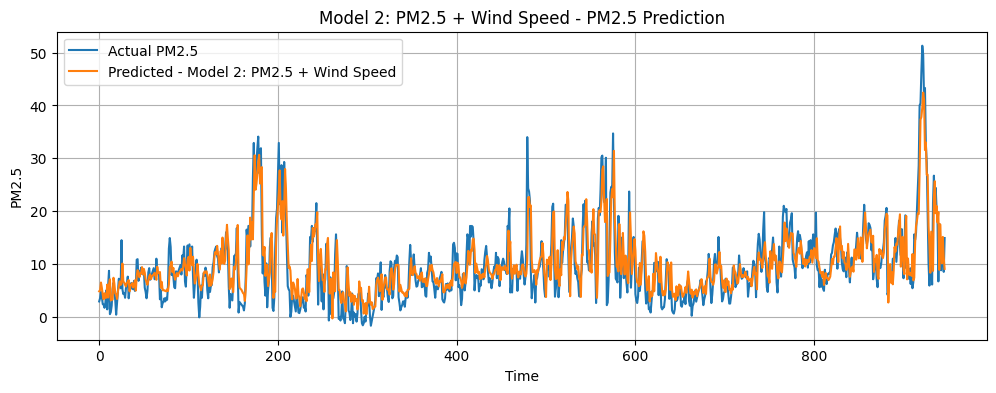

In [ ]:
model, mae, rmse, r2 = run_lstm_pipeline(df_pm25_wind_speed, model_name="Model 2: PM2.5 + Wind Speed")
model.save("pm25_wind_speed.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MAE: 2.87
MSE: 15.37
RMSE: 3.92
R²: 0.68
Model 3: PM2.5 + Humidity: MAE=2.87, RMSE=3.92, R²=0.676


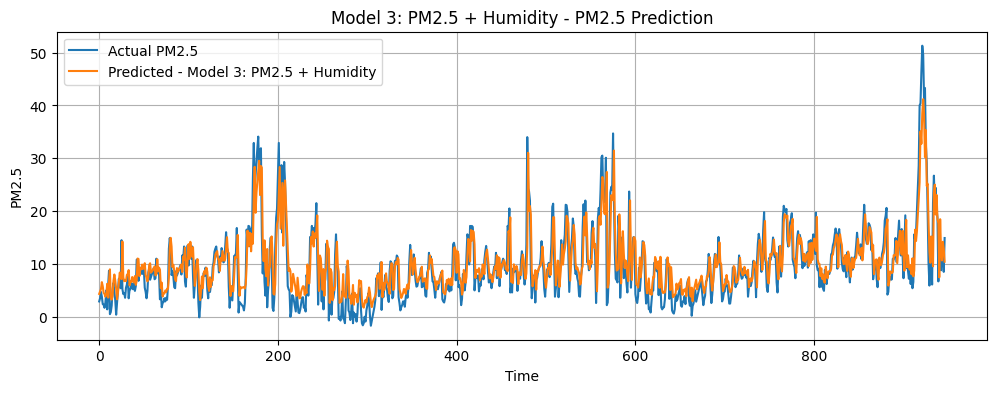

In [ ]:
model, mae, rmse, r2 = run_lstm_pipeline(df_pm25_rel_humidity, model_name="Model 3: PM2.5 + Humidity")
model.save("pm25_humidity.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MAE: 2.81
MSE: 15.37
RMSE: 3.92
R²: 0.68
Model 4: PM2.5 + Solar Radiation: MAE=2.81, RMSE=3.92, R²=0.676


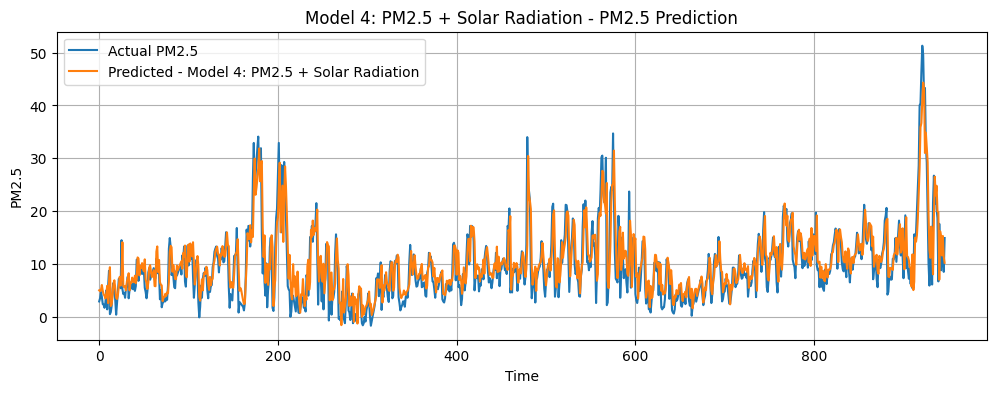

In [ ]:
model, mae, rmse, r2 = run_lstm_pipeline(df_pm25_solar_radiation, model_name="Model 4: PM2.5 + Solar Radiation")
model.save("pm25_solar_radiation.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MAE: 3.09
MSE: 16.75
RMSE: 4.09
R²: 0.65
Model 5: PM2.5 + All Meteorological Features: MAE=3.09, RMSE=4.09, R²=0.647


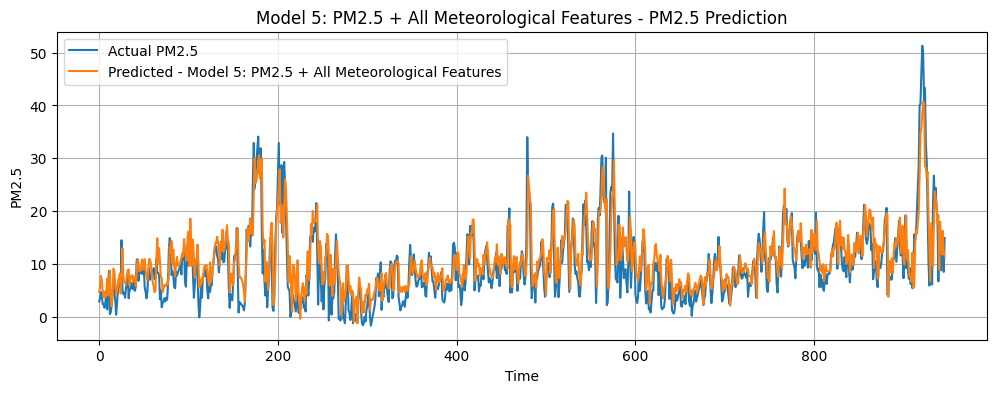

In [ ]:
model, mae, rmse, r2 = run_lstm_pipeline(df_all, model_name="Model 5: PM2.5 + All Meteorological Features")
model.save("pm25_all.h5")

# Thus, including Solar Radiation, Humidity, and Wind Speed improves the performance of our LSTM model that predicts PM 2.5

In [ ]:
# Model 2: LSTM with Beneficial Features
df_beneficial_features = merged_df_continuous[['pm25', 'wind_speed', 'rel_humidity', 'solar_radiation']]
df_beneficial_features.to_csv("df_beneficial_features.csv", index=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MAE: 2.77
MSE: 14.79
RMSE: 3.85
R²: 0.69
Model 7: PM2.5, Wind Speed, Humidity, & Solar Radiation: MAE=2.77, RMSE=3.85, R²=0.688


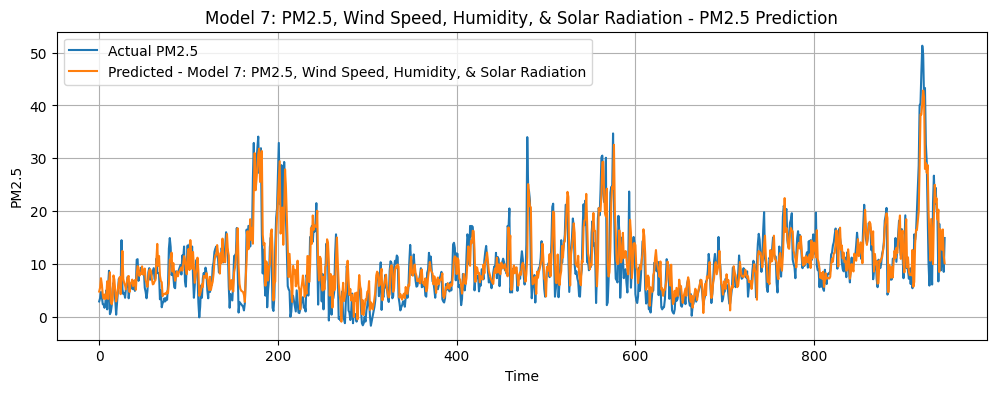

ValueError: The following argument(s) are not supported: ['index']

In [ ]:
model, mae, rmse, r2 = run_lstm_pipeline(df_beneficial_features, model_name="Model 7: PM2.5, Wind Speed, Humidity, & Solar Radiation")

In [ ]:
model.save("pm25_best.h5")

Why including those features doesn't help:
Weak correlation with PM2.5:
If features like temperature, humidity, or wind speed don't show a strong linear or nonlinear relationship with PM2.5, the LSTM has nothing useful to learn from them.

No added information:
Some features might already be implicitly represented in the existing data (e.g., time-of-day patterns might correlate with temperature indirectly).

Noise introduction:
Including irrelevant features adds noise and can make learning harder for the model without adding predictive power.